In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist =fetch_openml('mnist_784')   # this dataset is fetched online 

In [3]:
mnist['data']

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
mnist['target']

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [5]:
x=mnist['data']
y=mnist['target']
x.shape
# y.shape

(70000, 784)

In [6]:
# now we have to reshape the 1-D array to plot the image using matplotlib 
%matplotlib inline
import matplotlib 
import matplotlib.pyplot as plt

In [7]:
some_digit=x.iloc[3600].values   #randomly ek inout select krliya apne x input se 
some_digit_image=some_digit.reshape(28,28)   # uske corresponding image dekhni h 

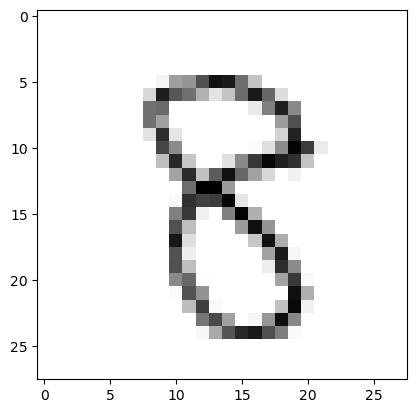

In [8]:
plt.imshow(some_digit_image ,cmap=matplotlib.cm.binary , interpolation="nearest")
plt.axis="off"

In [9]:
#to match the output we will check by 
y[3600]

'8'

In [10]:
X_train , X_test=x.iloc[:60000] , x.iloc[60000:]

In [11]:
y_train , y_test=y.iloc[:60000] , y.iloc[60000:]

In [12]:
import numpy as np
shuffled_idx=np.random.permutation(60000)
X_train , y_train = X_train.iloc[shuffled_idx] , y_train.iloc[shuffled_idx]

## creating a 2 detector 

In [13]:
y_train=y_train.astype(int)
y_train_2 =(y_train==2)
y_train_2    # it will convert the set into true or false 

45337    False
41244    False
56898    False
27730    False
59597     True
         ...  
13730    False
57940    False
1329     False
51936    False
6326     False
Name: class, Length: 60000, dtype: bool

In [14]:
ytest=y_test.astype(int)
y_test_2 =(y_test==2)
y_test_2 

60000    False
60001    False
60002    False
60003    False
60004    False
         ...  
69995    False
69996    False
69997    False
69998    False
69999    False
Name: class, Length: 10000, dtype: bool

## creating the model 

In [15]:
# binary classifieerrrrrr
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(tol=0.1)

In [16]:
model.fit(X_train,y_train_2)

LogisticRegression(tol=0.1)

In [17]:
model.predict([some_digit])

C:\Users\DELL\anacondaa\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([False])

In [18]:
from sklearn.model_selection import cross_val_score 
cross_val_score(model,X_train,y_train_2 , cv=3 ,scoring ="accuracy")

array([0.9781 , 0.97885, 0.97975])

In [19]:
# 97 % accuracy   -> may be the model is accurate or may be overfitting occurs 

In [20]:
# quiz 
#  we have to create a classifer that will classify a digit always as not 2


In [21]:
# from sklearn.tree import DecisionTreeRegressor 
# model=DecisionTreeRegressor ()
# model.fit(X_train , y_train_2)

In [22]:
# model.predict(X_test)

## we will then find our preciison , recall, f1 score 

In [23]:
from sklearn.model_selection import cross_val_predict 
y_pred=cross_val_predict(model,X_train,y_train_2, cv=3)

In [24]:
y_pred

array([False, False, False, ..., False, False, False])

In [28]:
# CREATING A CONFUSION MATRIX 
from sklearn.metrics import confusion_matrix

In [29]:
confusion_matrix(y_train_2,y_pred)

array([[53613,   429],
       [  837,  5121]], dtype=int64)

In [32]:
# to check the perfect matrix
# confusion_matrix(y_pred,y_pred)

In [34]:
#  CALCULATE THE PRECISION , RECALL , F1-SCORE 
from sklearn.metrics import precision_score , recall_score , f1_score 

In [35]:
precision_score(y_train_2 , y_pred)

0.9227027027027027

In [36]:
recall_score(y_train_2 , y_pred)

0.8595166163141994

In [37]:
f1_score(y_train_2 , y_pred)

0.8899895724713243

In [38]:
# finding the precision - recall curve 
from sklearn.metrics import precision_recall_curve


In [45]:
precision , recall , threshold =precision_recall_curve(y_train_2 , y_scores)

In [46]:
y_scores =cross_val_predict (model , X_train , y_train_2 , cv=3 , method="decision_function")

In [47]:
y_scores

array([-11.98758766,  -5.85220363,  -5.97612739, ..., -10.22855665,
        -7.64461963,  -4.23659684])

In [48]:
precision

array([0.0993    , 0.09930166, 0.09930331, ..., 1.        , 1.        ,
       1.        ])

In [49]:
recall

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
       3.35683115e-04, 1.67841558e-04, 0.00000000e+00])

In [50]:
threshold

array([-36.93043066, -36.37456641, -35.71496607, ...,  16.13678581,
        17.1438293 ,  17.44307391])

## Precision - Recall curve

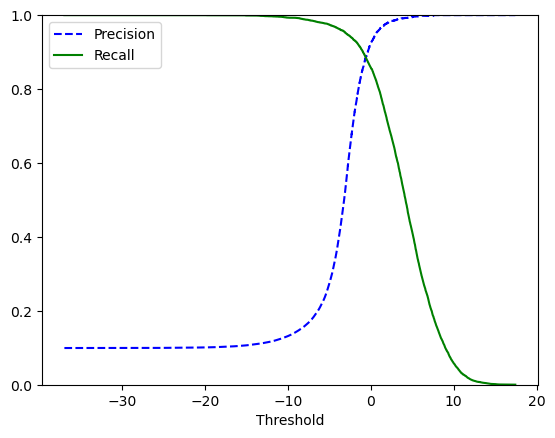

In [56]:
plt.plot(threshold , precision[:-1] , "b--" ,label="Precision")
plt.plot(threshold , recall[:-1] , "g-" , label="Recall")
plt.xlabel("Threshold")
plt.legend(loc="upper left")
plt.ylim([0,1])
plt.show()